In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

In [3]:
# Load Dataset
data = pd.read_csv('diabetes (1).csv')

In [4]:
print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:\n", data.head())
print("\nMissing Values:\n", data.isnull().sum())

Dataset Shape: (768, 9)

First 5 rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outco

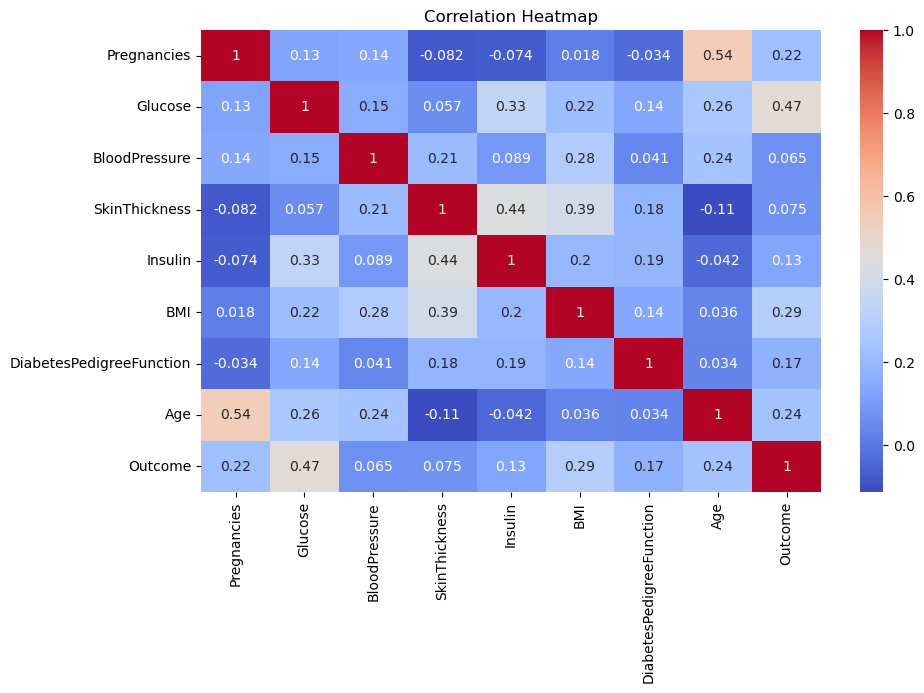

In [5]:
# Exploratory Data Analysis
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

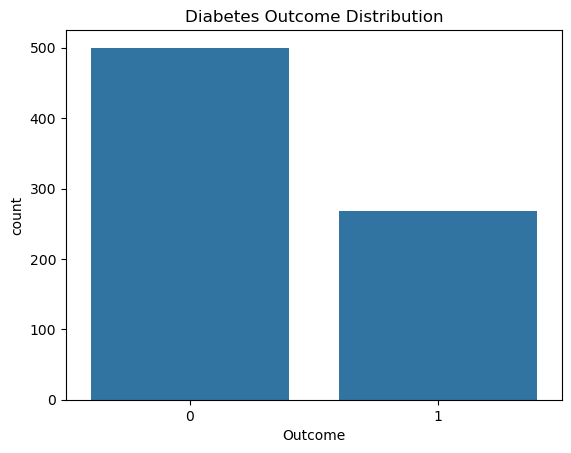

In [6]:
sns.countplot(x='Outcome', data=data)
plt.title("Diabetes Outcome Distribution")
plt.show()

In [7]:
# Define X and y
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [8]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
#Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]

In [12]:
#Model Evaluation
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.7142857142857143

Confusion Matrix:
 [[82 18]
 [26 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



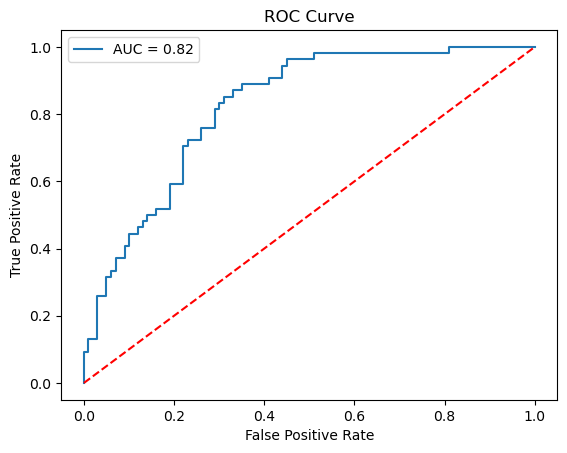

In [13]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, label="AUC = %.2f" % auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Interview Questions

#### 1) What is the difference between precision and recall?

  #### Precision
- Precision is about how accurate your positive predictions are.
- Formula = TP/(TP+FP)
- In real life if i say it’s positive I better be right.

#### Recall
- Recall is about how many actual positives your model managed to catch.
- Formula = TP/ (TP+FN)
- In real Life i should catch as many positives as possible.

#### 2) What is cross-validation, and why is it important in binary classification?

- Cross-validation is a technique where we split the dataset into multiple parts, train the model on some parts, and test it on the remaining part.
- It repeat this several times.

  #### Why its important

- It helps detect overfitting

- It ensures the model is stable across different data samples

- It gives a more trustworthy accuracy, precision, recall, etc.